## Source and Sink example


In [1]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

N = 101
x_start, x_end = -4.0, 4.0
y_start, y_end = -4.0, 4.0
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)

print('x =',x)
print('y =',y)

X,Y = np.meshgrid(x,y)

x = [-4.   -3.92 -3.84 -3.76 -3.68 -3.6  -3.52 -3.44 -3.36 -3.28 -3.2  -3.12
 -3.04 -2.96 -2.88 -2.8  -2.72 -2.64 -2.56 -2.48 -2.4  -2.32 -2.24 -2.16
 -2.08 -2.   -1.92 -1.84 -1.76 -1.68 -1.6  -1.52 -1.44 -1.36 -1.28 -1.2
 -1.12 -1.04 -0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24
 -0.16 -0.08  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72
  0.8   0.88  0.96  1.04  1.12  1.2   1.28  1.36  1.44  1.52  1.6   1.68
  1.76  1.84  1.92  2.    2.08  2.16  2.24  2.32  2.4   2.48  2.56  2.64
  2.72  2.8   2.88  2.96  3.04  3.12  3.2   3.28  3.36  3.44  3.52  3.6
  3.68  3.76  3.84  3.92  4.  ]
y = [-4.   -3.92 -3.84 -3.76 -3.68 -3.6  -3.52 -3.44 -3.36 -3.28 -3.2  -3.12
 -3.04 -2.96 -2.88 -2.8  -2.72 -2.64 -2.56 -2.48 -2.4  -2.32 -2.24 -2.16
 -2.08 -2.   -1.92 -1.84 -1.76 -1.68 -1.6  -1.52 -1.44 -1.36 -1.28 -1.2
 -1.12 -1.04 -0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24
 -0.16 -0.08  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72
  0.8   0.88  

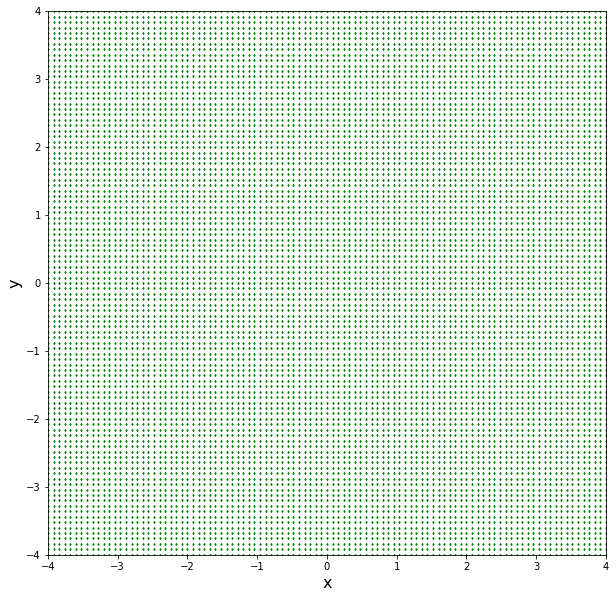

In [2]:
width = 10.0
height = ((y_end - y_start)/(x_end - x_start)) * width
plt.figure(figsize=(width,height))
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)
plt.scatter(X,Y, s=2, c= 'g',marker = 'd')

In [3]:
strength_source =5.0
x_source, y_source = -1.0,0.0

u_source = (strength_source/(2*np.pi)*
           (X-x_source)/((X-x_source)**2 + (Y-y_source)**2))
v_source = (strength_source/(2*np.pi)*
           (Y-y_source)/((X-x_source)**2 + (Y-y_source)**2))

                   


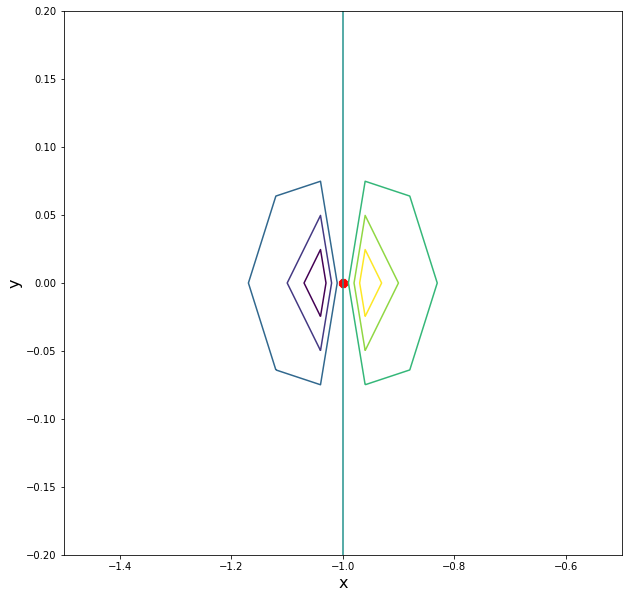

In [4]:
plt.figure(figsize=(width,height))
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.xlim(-1.5,-.5)
plt.ylim(-0.2,0.2)
#plt.streamplot(X,Y,u_source,v_source,
              # density=2,linewidth=1,arrowsize=2,arrowstyle='->')
plt.contour(X,Y,u_source)
plt.scatter(x_source,y_source, c='r',s=80, marker='8')

In [5]:
strength_sink =-5.0
x_sink, y_sink = 1.0,0

u_sink = (strength_sink/(2*np.pi)*
         (X-x_sink)/((X-x_sink)**2+(Y-y_sink)**2))
v_sink = (strength_sink/(2*np.pi)*
         (Y-y_sink)/((X-x_sink)**2+(Y-y_sink)**2))

phi_source_r = ((strength_source)/(2*np.pi))*(np.log(((X-x_source)**2+(Y-y_source)**2))+np.log(((X-x_sink)**2+(Y-y_sink)**2))) 

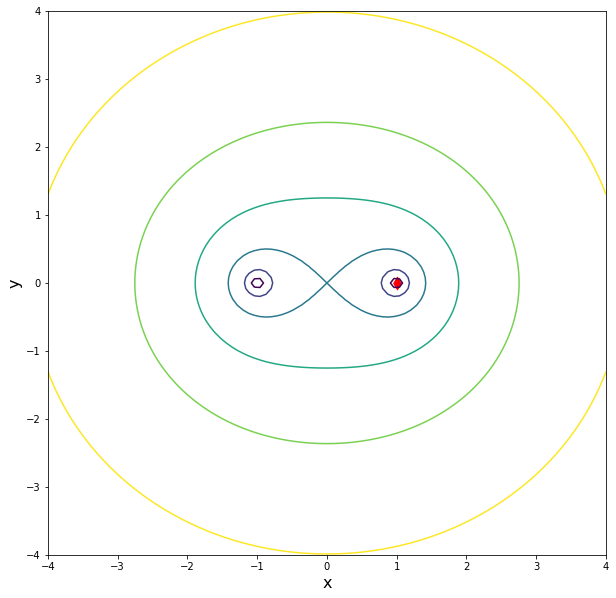

In [6]:
plt.figure(figsize=(width,height))
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)
plt.contour(X,Y,phi_source_r)

plt.scatter(x_sink,y_sink,c='r',s=80,marker='d')

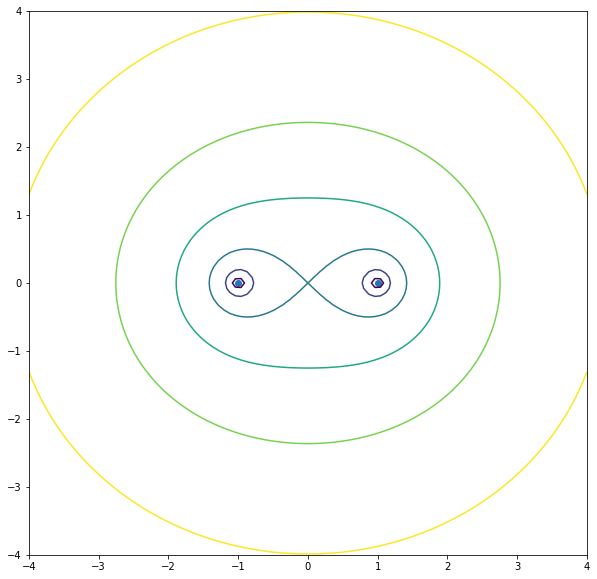

In [7]:
u_pair = u_source + u_sink
v_pair = v_source + v_sink

plt.figure(figsize=(width,height))
plt.xlabel='x'
plt.ylabel ='y'
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)

plt.contour(X,Y,phi_source_r)
plt.scatter([x_source,x_sink],[y_source, y_sink])

In [8]:
import numpy as np
u_inf = 1.0        # freestream speed

# compute the freestream velocity field
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

# compute the stream-function. zero angle of attack
psi_freestream = u_inf * Y

In [9]:

psi_freestream 

array([[-4.  , -4.  , -4.  , ..., -4.  , -4.  , -4.  ],
       [-3.92, -3.92, -3.92, ..., -3.92, -3.92, -3.92],
       [-3.84, -3.84, -3.84, ..., -3.84, -3.84, -3.84],
       ..., 
       [ 3.84,  3.84,  3.84, ...,  3.84,  3.84,  3.84],
       [ 3.92,  3.92,  3.92, ...,  3.92,  3.92,  3.92],
       [ 4.  ,  4.  ,  4.  , ...,  4.  ,  4.  ,  4.  ]])

In [10]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = (strength / (2 * np.pi)) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

In [11]:
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (2 * np.pi) * np.arctan2((Y - ys), (X - xs))
    
    return psi

In [12]:
source_strength = 5.0
x_source, y_source = -1.0, 0.0

u_source, vsource = get_velocity(source_strength, x_source, y_source, X,Y)
psi_source = get_stream_function(source_strength, -1, 0, X,Y)

u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_source+ psi_freestream


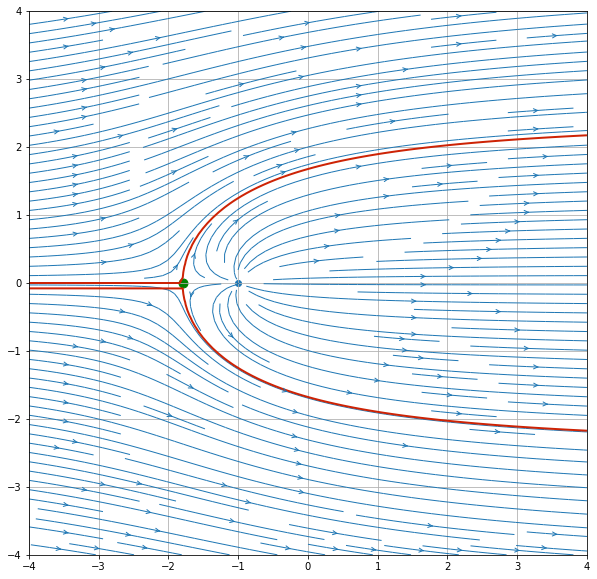

In [13]:

width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.grid(True)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_source, y_source)

x_stagnation = x_source - strength_source / (2 * np.pi * u_inf)
y_stagnation = y_source

plt.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')



plt.contour(X, Y, psi, 
               levels=[-np.abs(psi[50,37]),np.abs(psi[50,37])], 
               colors='#CD2305', linewidths=2, linestyles='solid');

In [14]:
np.argmin(u[50])



37

In [15]:
X[:,26]


array([-1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92,
       -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92,
       -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92,
       -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92,
       -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92,
       -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92,
       -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92,
       -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92,
       -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92,
       -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92,
       -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92, -1.92,
       -1.92, -1.92])

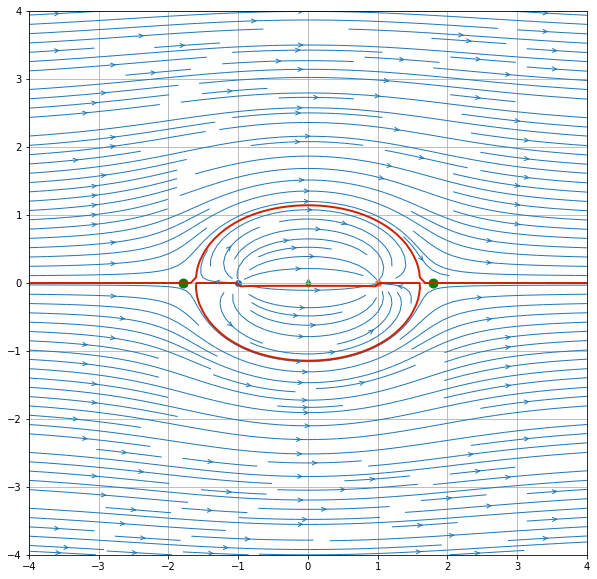

In [16]:
strenth_sink = -5.0
x_sink, y_sink = 1.0,0.0

u_sink, v_sink = get_velocity(strength_sink, x_sink, y_sink, X,Y)
psi_sink = get_stream_function(strenth_sink, x_sink, y_sink,X,Y)

u = u_freestream+ u_sink+ u_source
v= v_freestream + v_sink+v_source
psi= psi_freestream+ psi_source+psi_sink

width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.grid(True)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_source, y_source)
plt.scatter(x_sink,y_sink)

x_stagnation1 = x_source - strength_source / (2 * np.pi * u_inf)
y_stagnation1 = y_source
plt.scatter(x_stagnation1, y_stagnation1, color='g', s=80, marker='o')

x_stagnation2 = x_sink - strength_sink / (2 * np.pi * u_inf)
y_stagnation2 = y_sink
plt.scatter(x_stagnation2, y_stagnation2, color='g', s=80, marker='o')

x_min_cp= np.mean(X[50,:])
y_min_cp= np.mean(Y[:,])
plt.scatter(x_min_cp,y_min_cp,marker='d')


plt.contour(X, Y, psi, 
               levels=[0], 
               colors='#CD2305', linewidths=2, linestyles='solid');


In [17]:
x_stagnation2- x_stagnation1

3.5915494309189535

In [18]:
Cp = 1 - u**2 +v**2/u_inf**2

In [19]:
np.where(Cp==np.min(Cp))

(array([50, 50]), array([38, 62]))

In [20]:
x_min_cp


7.0350765916841603e-17

In [21]:
np.where(v==0)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  50,
         50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,
         50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,
         50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,
         50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,
         50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,
         50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,
         50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,
         50,  50,  50,  50,  50,  50,  50,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77

In [22]:
v


array([[-0.0496874 , -0.0506136 , -0.05153074, ...,  0.05153074,
         0.0506136 ,  0.0496874 ],
       [-0.05074401, -0.0517319 , -0.05271278, ...,  0.05271278,
         0.0517319 ,  0.05074401],
       [-0.0518047 , -0.05285718, -0.05390495, ...,  0.05390495,
         0.05285718,  0.0518047 ],
       ..., 
       [ 0.0518047 ,  0.05285718,  0.05390495, ..., -0.05390495,
        -0.05285718, -0.0518047 ],
       [ 0.05074401,  0.0517319 ,  0.05271278, ..., -0.05271278,
        -0.0517319 , -0.05074401],
       [ 0.0496874 ,  0.0506136 ,  0.05153074, ..., -0.05153074,
        -0.0506136 , -0.0496874 ]])

In [33]:
import math

#redefine the mesh grid 
N = 100
x  = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, x_end,N)
X, Y = np.meshgrid(x,y)

kappa = 1.0                        
x_doublet, y_doublet = 0.0, 0.0 
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0

def get_velocity_doublet(strength, xd, yd, X, Y):
    
    u = (- strength / (2 * math.pi) *
         ((X - xd)**2 - (Y - yd)**2) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (- strength / (2 * math.pi) *
         2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):

    psi = - strength / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    
    return psi


In [34]:

u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)


psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

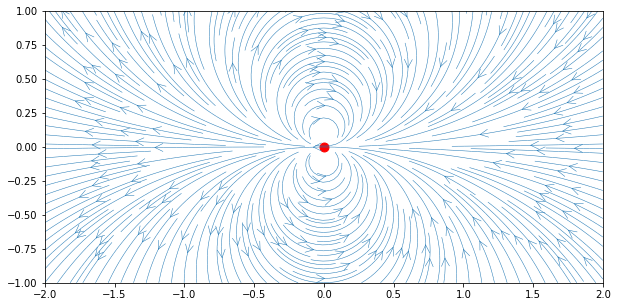

In [35]:
width =10
height = (y_end - y_start)/(x_end - x_start)*width
plt.figure(figsize=(width, height))

plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_doublet, v_doublet,
                  density=3, linewidth=0.5, arrowsize=2, arrowstyle='->')
plt.scatter(x_doublet, y_doublet, color='red', s=80, marker='o');

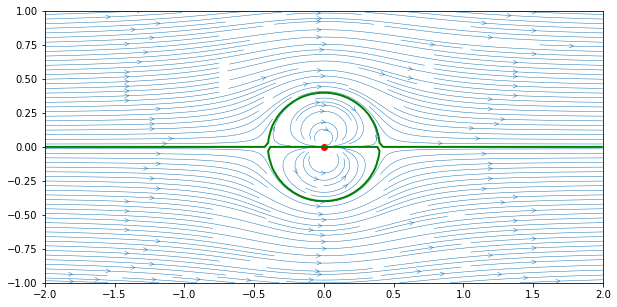

In [44]:
u_inf =1.0

u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

u = u_doublet + u_freestream
v = v_doublet + v_freestream

psi = psi_doublet + psi_freestream

width =10
height = (y_end - y_start)/(x_end - x_start)*width

plt.figure(figsize=(width,height))
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X,Y, u,v,density=3, linewidth=0.5, arrowsize=1, arrowstyle='->')
plt.contour(X, Y, psi,
               levels=[0.], colors='green', linewidths=2, linestyles='solid')
plt.scatter(x_doublet, y_doublet, color='red')

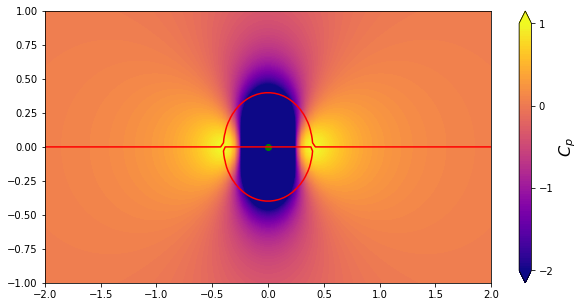

In [49]:
plt.figure(figsize=(width,height))
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)

cp = 1.0 - (u**2 + v**2) / u_inf**2

contf = plt.contourf(X, Y, cp, levels = np.linspace(-2.0,1.0,100),extend='both',cmap = 'plasma')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
plt.scatter(x_doublet, y_doublet,color = 'green')
plt.contour(X, Y, psi, levels=[0.], colors = 'red')



In [30]:
np.shape(X)

(50, 50)